## Import the Knowledgebase Class

The following code imports the base class, called Bitome, that will load and contain the knowledgebase (along with a
useful built-in Python package for ensuring compatibility of file paths across operating systems):

In [1]:
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import networkx as nx

sys.path.append('../bitome-kb/')

from bitome.core import Bitome

## Save and Reload the Knowledgebase

For convenience, the fully-loaded Bitome knowledgebase can be dumped to a `pickle` file for easy re-loading
if the underlying data has not changed. Once the following cell has been executed, the `bitome.pkl` file created in the
`data` directory can be loaded (instead of running the more time-consuming `load_data` method).

In [2]:
# now, let's initiate a new Bitome knowledgebase from that file
bitome = Bitome.init_from_file('bitome.pkl')

## Exploring the Bitome 

The Bitome knowledgebase is a collection of heavily-linked objects. These objects may be accessed via attributes of the bitome object we've instantiated above. An example of such "link-hopping" is given below:

### Simple Example of Link-Hopping

In [32]:
# pull out the dsrA gene (chosen at random) from the master list of genes in the knowledgebase 
# NOTE: I just entered 2000 and then later added this comment to determine the gene is dsrA; I need to add 
# a convenient function for pulling out a gene object by name...
dsrA = bitome.genes[2000]

# print out some features of this gene
print(f'Gene name: {dsrA.name}')
print(f'Gene location: {dsrA.location}')
print(f'Gene sequence: {dsrA.sequence}')
print(f'Type of random_gene object: {type(dsrA)}')

Gene name: dsrA
Gene location: [ExactPosition(2025226):ExactPosition(2025313)](-)
Gene sequence: AACACATCAGATTTCCTGGTGTAACGAATTTTTTAAGTGCTTCTTGCTTAAGCAAGTTTCATCCCGACCCCCTCAGGGTCGGGATTT
Type of random_gene object: <class 'bitome.features.Gene'>


In [4]:
dsrA.transcription_units

In [11]:
dsrA_tu = dsrA.transcription_units[0]

print(f'TU name: {dsrA_tu.name}')
print(f'Part of operon: {dsrA_tu.operon.name}')
print(f'TU location: {dsrA_tu.location}')
print(f'TU object type: {type(dsrA_tu)}')

TU name: dsrA
Part of operon: dsrA
TU location: [ExactPosition(2025226):ExactPosition(2025313)](-)
TU object type: <class 'bitome.features.TranscriptionUnit'>


In [6]:
dsrA_tu.operon.name

'dsrA'

In [7]:
[tu.operon.name for tu in dsrA.transcription_units]

['dsrA']

What about promoters? Each TranscriptionUnit object has a promoter attribute, which in turn links to things like TF binding sites, attenuators, and more:

NOTE: not all TUs have an annotated promoter (in those cases, the tu.promoter attribute will be `None`)

The Promoter object houses the TSS information:

In [8]:
dsrA_prom = dsrA_tu.promoter

print(f'Promoter name: {dsrA_prom.name}')
print(f'Promoter location: {dsrA_prom.location}')
print(f'Promoter object type: {type(dsrA_prom)}')
print(f'TSS: {dsrA_prom.tss}')

Promoter name: dsrAp
Promoter location: [ExactPosition(2025292):ExactPosition(2025373)](-)
Promoter object type: <class 'bitome.features.Promoter'>
TSS: 2025313


In [9]:
[tu.promoter.tss for tu in dsrA.transcription_units]

[2025313]

### Bitome Table of Contents

The Bitome contains master lists of many different types of objects, all that can be located on the provided reference sequence. Below is shown a master list of those attributes:

In [10]:
print(f'Genes: {len(bitome.genes)}')
print(f'Proteins: {len(bitome.proteins)}')
print(f'Mobile Elements: {len(bitome.mobile_elements)}')
print(f'Repeat Regions: {len(bitome.repeat_regions)}')
print(f'Operons: {len(bitome.operons)}')
print(f'Transcription Units: {len(bitome.transcription_units)}')
print(f'Promoters: {len(bitome.promoters)}')
print(f'Terminators: {len(bitome.terminators)}')
print(f'Attenuators: {len(bitome.attenuators)}')
print(f'Shine-Dalgarnos: {len(bitome.shine_dalgarnos)}')
print(f'Riboswitches: {len(bitome.riboswitches)}')
print(f'Transcription Factors: {len(bitome.transcription_factors)}')
print(f'TF binding sites: {len(bitome.tf_binding_sites)}')
print(f'Regulons: {len(bitome.regulons)}')
print(f'iModulons: {len(bitome.i_modulons)}')

Genes: 4497
Proteins: 4140
Mobile Elements: 49
Repeat Regions: 355
Operons: 2619
Transcription Units: 3560
Promoters: 8631
Terminators: 512
Attenuators: 1466
Shine-Dalgarnos: 179
Riboswitches: 51
Transcription Factors: 224
TF binding sites: 3235
Regulons: 493
iModulons: 61


The Bitome also retains the full sequence, along with the GenBank record and ID:

In [ ]:
print(f'GenBank ID: {bitome.genbank_id}')
print(f'Full Sequence (first 200 bps): {bitome.sequence[:200]}')
print(f'GenBank description: {bitome.description}')

### Bitome Linkage Map

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


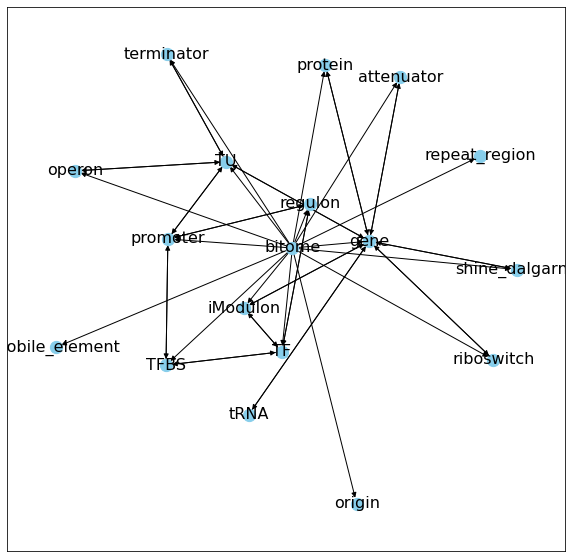

In [12]:
bitome_graph = nx.MultiDiGraph()
bitome_graph.add_edges_from([
    ('bitome', 'gene', 'multi'),
    ('gene', 'protein', 'single'),
    ('gene', 'tRNA', 'single'),
    ('gene', 'TU', 'multi'),
    ('gene', 'attenuator', 'multi'),
    ('gene', 'riboswitch', 'multi'),
    ('gene', 'shine_dalgarno', 'single'),
    ('gene', 'iModulon', 'multi'),
    ('bitome', 'protein', 'multi'),
    ('protein', 'gene', 'single'),
    ('tRNA', 'gene', 'single'),
    ('bitome', 'mobile_element', 'multi'),
    ('bitome', 'repeat_region', 'multi'),
    ('bitome', 'origin', 'single'),
    ('bitome', 'operon', 'multi'),
    ('operon', 'TU', 'multi'),
    ('bitome', 'TU', 'multi'),
    ('TU', 'operon', 'single'),
    ('TU', 'promoter', 'single'),
    ('TU', 'gene', 'multi'),
    ('TU', 'terminator', 'multi'),
    ('bitome', 'promoter', 'multi'),
    ('promoter', 'TU', 'single'),
    ('promoter', 'TFBS', 'multi'),
    ('promoter', 'regulon', 'multi'),
    ('bitome', 'terminator', 'multi'),
    ('terminator', 'TU', 'multi'),
    ('bitome', 'attenuator', 'multi'),
    ('attenuator', 'gene', 'single'),
    ('bitome', 'shine_dalgarno', 'multi'),
    ('shine_dalgarno', 'gene', 'single'),
    ('bitome', 'riboswitch', 'multi'),
    ('riboswitch', 'gene', 'single'),
    ('bitome', 'TF', 'multi'),
    ('TF', 'TFBS', 'multi'),
    ('TF', 'regulon', 'multi'),
    ('TF', 'iModulon', 'multi'),
    ('bitome', 'regulon', 'multi'),
    ('regulon', 'promoter', 'multi'),
    ('regulon', 'TF', 'multi'),
    ('bitome', 'iModulon', 'multi'),
    ('iModulon', 'TF', 'multi'),
    ('iModulon', 'gene', 'multi'),
    ('bitome', 'TFBS', 'multi'),
    ('TFBS', 'TF', 'single'),
    ('TFBS', 'promoter', 'multi')
])

_, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx(
    bitome_graph,
    pos=nx.spring_layout(bitome_graph, k=1),
    ax=ax,
    node_size=150,
    node_color='skyblue',
    font_size='16'
)

## Promoter statistics

How many distinct promoter regions are there? (including counting bidirectionality of DNA)

In [13]:
#This value is larger than the actual number of promoter regions
print(f'Promoters: {len(bitome.promoters)}')

#Every TSS has a promoter defined as -40 to +40 of the promoter - in addition to the TU associated promoters

#these promoters are from regulonDB - check on their documentation for how they do it

#Some of the TUs dont have TSSs - need to check on the promoter

#Check on TUs without a TSSs - are they actually leaderless or do they have a TSS in shape and RBS location

Promoters: 8631


Get the promoter for a single gene

In [27]:
from openpyxl import load_workbook
import pandas as pd
import numpy as np

In [25]:
file_export = "test_export.xlsx"

In [29]:
locs_genes = []
names_genes = []
for gene in bitome.genes:
    cur_name = gene.name
    names_genes.append(cur_name)
    cur_loc = gene.location.start.real
    locs_genes.append(cur_loc)

locs_array = np.array([names_genes,locs_genes])

In [30]:
df = pd.DataFrame(locs_array.T,columns=['Gene_Name','Gene_Start'])

In [31]:
df.to_excel(file_export,index=False)

In [15]:
dsrA = bitome.genes[2000]

print(f'Gene name: {dsrA.name}')
print(f'Gene location: {dsrA.location}')

dsrA_tu = dsrA.transcription_units[0]

dsrA_prom = dsrA_tu.promoter

print(f'Promoter name: {dsrA_prom.name}')
print(f'Promoter location: {dsrA_prom.location}')
print(f'Promoter object type: {type(dsrA_prom)}')

Gene location: [ExactPosition(2025226):ExactPosition(2025313)](-)
Promoter name: dsrAp
Promoter location: [ExactPosition(2025292):ExactPosition(2025373)](-)
Promoter object type: <class 'bitome.features.Promoter'>


What core promoter elements do they have? How good are these motifs compared to other sites across the genome?

How many TF motifs per promoter, what kind (tf/sigma, act/inh), and where? Any facing the 'wrong' direction?

What is the basal expression of the gene and how does it relate to other promoter features?

What types of complex promoters exist?

Where is the promoter relative to ori and ter, and absolute location?

What are the promoters of leaderless transcripts like?

## Utilities

(<matplotlib.axes._subplots.AxesSubplot at 0x2103d82a6d0>,
 ({GF(Small feature, 0-20 (1)): 0,
   GF(Gene 1 with a very long name, 20-500 (1)): 0,
   GF(Gene 2, 400-700 (-1)): 1.0,
   GF(Gene 3, 600-900 (1)): 0},
  {GF(Gene 1 with a very long name, 20-500 (1)): {'feature_y': 0,
    'annotation_y': 2.0},
   GF(Small feature, 0-20 (1)): {'feature_y': 0, 'annotation_y': 1.0}}))

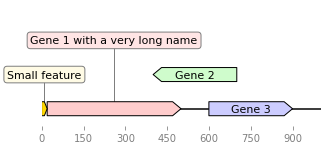

In [11]:
#https://github.com/Edinburgh-Genome-Foundry/DnaFeaturesViewer
from dna_features_viewer import GraphicFeature, GraphicRecord
features=[
    GraphicFeature(start=0, end=20, strand=+1, color="#ffd700",
                   label="Small feature"),
    GraphicFeature(start=20, end=500, strand=+1, color="#ffcccc",
                   label="Gene 1 with a very long name"),
    GraphicFeature(start=400, end=700, strand=-1, color="#cffccc",
                   label="Gene 2"),
    GraphicFeature(start=600, end=900, strand=+1, color="#ccccff",
                   label="Gene 3")
]
record = GraphicRecord(sequence_length=1000, features=features)
record.plot(figure_width=5)

(<matplotlib.axes._subplots.AxesSubplot at 0x21048518cd0>,
 ({GF(Small feature, 0-20 (1)): 0,
   GF(Gene 1 with a very long name, 20-500 (1)): 0,
   GF(Gene 2, 400-700 (-1)): 1.0,
   GF(Gene 3, 600-900 (1)): 0},
  {GF(Gene 1 with a very long name, 20-500 (1)): {'feature_y': -1.0596548213901706,
    'annotation_y': 0.45},
   GF(Gene 2, 400-700 (-1)): {'feature_y': -2.142427152334812,
    'annotation_y': 0.95},
   GF(Gene 3, 600-900 (1)): {'feature_y': -1.00314158748588,
    'annotation_y': 0.45},
   GF(Small feature, 0-20 (1)): {'feature_y': -0.0017809347217881966,
    'annotation_y': 0.7}}))

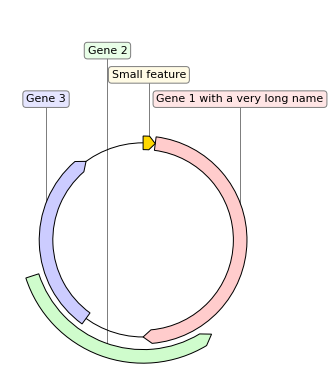

In [13]:
from dna_features_viewer import CircularGraphicRecord
record = CircularGraphicRecord(sequence_length=1000, features=features)
record.plot(figure_width=5)

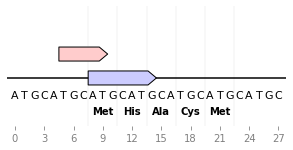

In [3]:
from dna_features_viewer import GraphicFeature, GraphicRecord

sequence = "ATGCATGCATGCATGCATGCATGCATGC"
record = GraphicRecord(sequence=sequence, features=[
    GraphicFeature(start=5, end=10, strand=+1, color='#ffcccc'),
    GraphicFeature(start=8, end=15, strand=+1, color='#ccccff')
])

ax, _ = record.plot(figure_width=5)
record.plot_sequence(ax)
record.plot_translation(ax, (8, 23), fontdict={'weight': 'bold'})
ax.figure.savefig('sequence_and_translation.png', bbox_inches='tight')

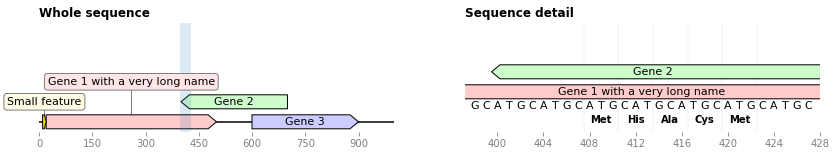

In [4]:
"""Generate a 2-plot figure with full sequence on the left,
detail of a sub-segment on the right."""

from dna_features_viewer import GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt

record = GraphicRecord(sequence=250 * "ATGC", features=[
    GraphicFeature(start=10, end=20, strand=+1, color="#ffd700",
                   label="Small feature"),
    GraphicFeature(start=20, end=500, strand=+1, color="#ffcccc",
                   label="Gene 1 with a very long name"),
    GraphicFeature(start=400, end=700, strand=-1, color="#cffccc",
                   label="Gene 2"),
    GraphicFeature(start=600, end=900, strand=+1, color="#ccccff",
                   label="Gene 3")
])
zoom_start, zoom_end = 398, 428  # coordinates of the "detail"
cropped_record = record.crop((zoom_start, zoom_end))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 2))

# PLOT THE WHOLE SEQUENCE

ax1.set_title("Whole sequence", loc='left', weight='bold')
record.plot(ax=ax1)
ax1.fill_between((zoom_start, zoom_end), +1000, -1000, alpha=0.15)

# PLOT THE SEQUENCE DETAILS


cropped_record.plot_translation(ax=ax2, location=(408, 423),
                                fontdict={'weight': 'bold'})
cropped_record.plot(ax=ax2, plot_sequence=True)
ax2.set_title("Sequence detail", loc='left', weight='bold')

fig.savefig('overview_and_detail.png', bbox_inches='tight')

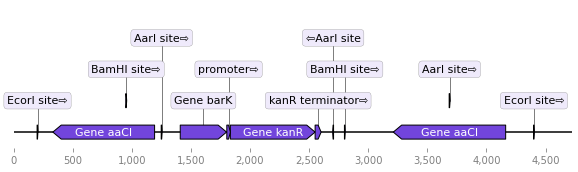

In [9]:
from dna_features_viewer import BiopythonTranslator
graphic_record = BiopythonTranslator().translate_record("example_sequence.gb")
ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)

Text(0, 0.5, 'GC(%)')

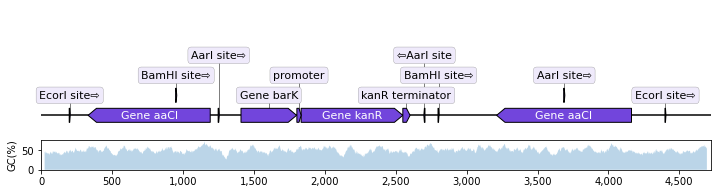

In [8]:
import matplotlib.pyplot as plt
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO
import numpy as np

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(12, 3), sharex=True, gridspec_kw={"height_ratios": [4, 1]}
)

# PLOT THE RECORD MAP
record = SeqIO.read("example_sequence.gb", "genbank")
graphic_record = BiopythonTranslator().translate_record(record)
graphic_record.plot(ax=ax1, with_ruler=False, strand_in_label_threshold=4)

# PLOT THE LOCAL GC CONTENT (we use 50bp windows)
gc = lambda s: 100.0 * len([c for c in s if c in "GC"]) / 50
xx = np.arange(len(record.seq) - 50)
yy = [gc(record.seq[x : x + 50]) for x in xx]
ax2.fill_between(xx + 25, yy, alpha=0.3)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("GC(%)")

In [10]:
graphic_record.plot_on_multiple_pages(
    "multipage_plot.pdf",
    nucl_per_line=70,
    lines_per_page=7,
    plot_sequence=True
)

A function for finding a feature with a given name.

In [ ]:
glpR = [gene for gene in bitome.genes if gene.name == 'glpR'][0]
print(glpR.name)
print(glpR.location)

Sequence location slicing

This example shows how to extract an arbitrary genomic locus from the main sequence. Let's say we wanted to pull out the sequence of the 5' UTR for glpR (from above). Note that glpR is on the (-), or reverse, strand; so the "right" end of the position is the 5' end. 

In Biopython's SeqLocation terms, left = "start" and right = "end", REGARDLESS of strand. It's annoying and confusing...

I can write some better utility functions for this sort of thing if desired.

In [ ]:
from Bio.SeqFeature import FeatureLocation

# so we're giving as the left end, the START of the gene, which is the "end" of its location...
# and as the right end for the 5' UTR, we're giving the TSS for the promoter (just taking the first one arbitrarily)
FeatureLocation(glpR.location.end.position, glpR.transcription_units[0].promoter.tss).extract(bitome.sequence)